# generate 'supermeans' for validation notes

Firstly, clear all variables in the local memory.

In [1]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

Now import modules etc.

In [2]:
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import datetime
from iris.time import PartialDateTime
import iris.analysis
import netCDF4
from netCDF4 import Dataset
import os
from pylab import *
import cartopy.crs as ccrs
import iris.analysis.cartography
import re
from os import listdir

The following renders graphics inside the Jupyter document

In [3]:
%matplotlib inline

Increase font size for graphics

In [7]:
matplotlib.rcParams['font.size'] = 24

test the graphics!
example from here... https://matplotlib.org/users/pyplot_tutorial.html

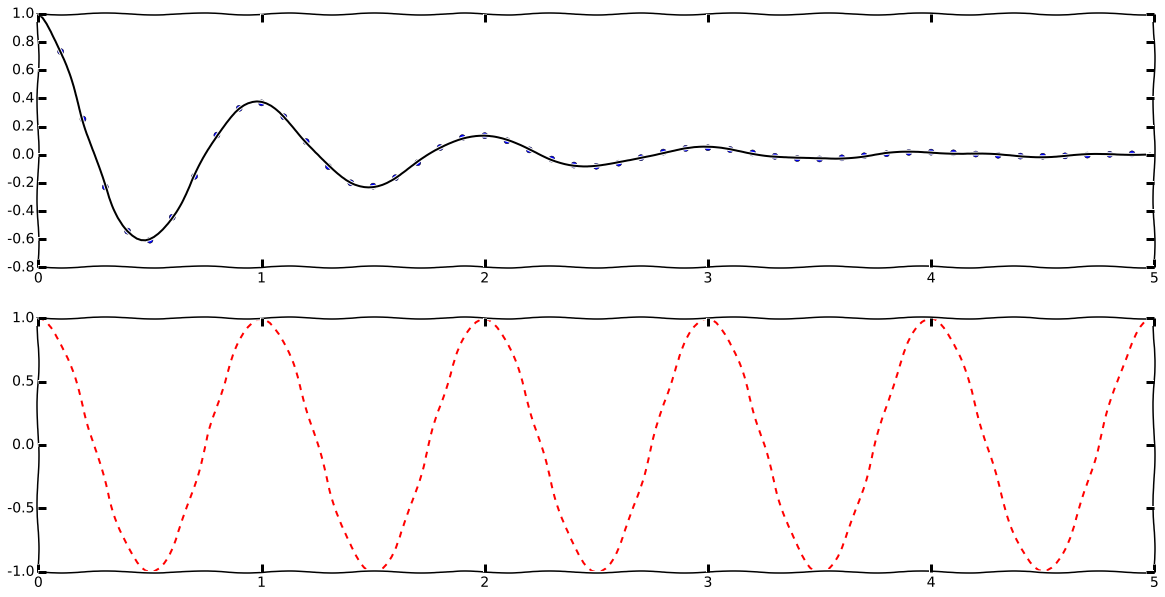

In [17]:
plt.figure(figsize=(20,10))

plt.xkcd()

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


load data 

In [9]:
base_dir='/home/williamsjh/cylc-run/'
runid='u-ap860'

full_dir=base_dir+runid+'/share/data/History_Data/'

firstyear=1989

years=tuple(range(firstyear,firstyear+10))

type(years)

#print the years
years


(1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998)

In [10]:
len(years)

if len(years) == 10:
    supermeanlabel = 'a'
    
if len(years) == 20:
    supermeanlabel = 'k'

if len(years) == 2:
    supermeanlabel = '2'

if len(years) >= 30 and len(years) <40:
    supermeanlabel = 't'

if len(years) >= 50 and len(years) <100:
    supermeanlabel = 'l'


In [11]:
for period in ['ann','djf','mam','jja','son']:
    
    print period
    sys.stdout.flush()
    
    if period == 'ann':
        sys.stdout.flush()
        fnames = [full_dir+'*py*{}*'.format(year) for year in years]
        print fnames
        sys.stdout.flush()
    else:
        fnames = [full_dir+'*ps*{}*'.format(year)+period for year in years]
        print fnames
        sys.stdout.flush()

    native = iris.load(fnames)
    nativemean = native 
    
    for i in range(len(native)):
        nativemean[i] = native[i].collapsed('time',iris.analysis.MEAN)
    
    os.chdir(full_dir)super

    if not os.path.exists(full_dir+'supermeans'):
        os.makedirs(full_dir+'supermeans')

    iris.save(nativemean,full_dir+'supermeans'+'/'+runid+'a.m'+supermeanlabel+str(years[-1])+period+'.pp')
    




ann
['/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1989*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1990*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1991*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1992*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1993*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1994*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1995*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1996*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1997*', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*py*1998*']


/home/williamsjh/.conda/envs/my_root/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i365 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/williamsjh/.conda/envs/my_root/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i366 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/williamsjh/.conda/envs/my_root/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i367 was not found in the STASH to grid type mapping. Picking the P position as the cell type
  'position as the cell type'.format(stash))
/home/williamsjh/.conda/envs/my_root/lib/python2.7/site-packages/iris/fileformats/_ff.py:732: UserWarning: The STASH code m01s03i370 was not found in the STASH to grid type mapping. Picking the P pos

djf
['/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1989*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1990*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1991*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1992*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1993*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1994*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1995*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1996*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1997*djf', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1998*djf']
mam
['/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1989*mam', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1990*mam', '/home/williamsjh/cylc-run/u-ap860/share/data/History_Data/*ps*1991*mam', '/home/williamsjh/cylc-run/u